# Exercise 1

Recall that n! is read as “n factorial” and defined as n!=n×(n−1)×⋯×2×1.

In Julia you can compute this value with factorial(n)

Write your own version of this function, called factorial2, using a for loop

In [1]:
function factorial2(n)
    local ret = 1
    for r in 1:n
        ret=ret*r
    end
    return ret
end

factorial2 (generic function with 1 method)

In [5]:
factorial(4) == factorial2(4)
@time factorial(10)
@time factorial2(10)

  0.000001 seconds (5 allocations: 176 bytes)
  0.000001 seconds (5 allocations: 176 bytes)


3628800

# Exercise 2

The binomial random variable Y∼Bin(n,p) represents

  - number of successes in n binary trials
  - each trial succeeds with probability p

Using only `rand()` from the set of Julia’s built in random number generators (not the Distributions package), write a function `binomial_rv` such that `binomial_rv(n, p)` generates one draw of Y

Hint: If U is uniform on (0,1) and p∈(0,1), then the expression `U < p` evaluates to `true` with probability p

In [6]:
## impl 1
function binomial_rv(n ,p)
    count = 0
    for r in 1:n
        if rand() < p
            count += 1
        end
    end
    return count
end

## impl 2
function binomial_rv2(n ,p)
    count = 0
    trials = rand(n)
    for trial in trials
        if trial < p
            count += 1
        end
    end
    return count
end

## impl 3
function binomial_rv3(n, p)
    length([r for r in rand(n) if r < p])
end

binomial_rv3 (generic function with 1 method)


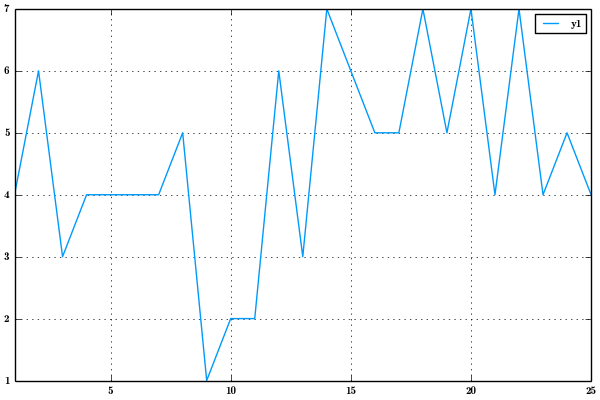

In [11]:
using Plots
plot([binomial_rv(10, 0.5) for r in 1:25])

# Exercise 3

Compute an approximation to π using Monte Carlo

For random number generation use only `rand()`

Your hints are as follows:

  - If U is a bivariate uniform random variable on the unit square (0,1)^2, then the probability that U lies in a subset B of (0,1)^2 is equal to the area of B
  - If U1,…,Un are iid copies of U, then, as n gets large, the fraction that falls in B converges to the probability of landing in B
  - For a circle, area = pi * radius^2

In [8]:
function monte_carlo(fun, n)
    succ = 0
    for r in 1:n
        if fun() == true
            succ += 1
        end
    end
    return succ / n
end

function appro_pi()
    x, y = rand(2)
    sqrt((x - 0.5)^2 + (y - 0.5)^2) <= 0.5
end

appro_pi (generic function with 1 method)

In [10]:
monte_carlo(appro_pi, 10000)*4

3.1276

# Exercise 4

Write a program that prints one realization of the following random device:

    Flip an unbiased coin 10 times
    If 3 consecutive heads occur one or more times within this sequence, pay one dollar
    If not, pay nothing

Once again use only rand() as your random number generator

In [ ]:
function calc_payoff()
    count = 0
    for i in 1:10
        count = rand() < 0.5 ? count + 1 : 0
        if count == 3
            return 1
        end
    end
    return 0
end

# Exercise 5

Simulate and plot the correlated time series

    x_{t+1}=αx_t+ε_{t+1} where x_0 = 0 and t=0,…,T

The sequence of shocks {ε_t} is assumed to be iid and standard normal

Set T=200 and α=0.9

In [12]:
## impl 1
function time_series(t, α)
    x = zeros(t + 1)
    for r in 1:t
        x[r+1] = α * x[r] + randn()
    end
end

## impl 2
function time_series2(t, α)
    prev= 0
    [prev = α * prev + randn() for r in 1:t]
end

time_series2 (generic function with 1 method)


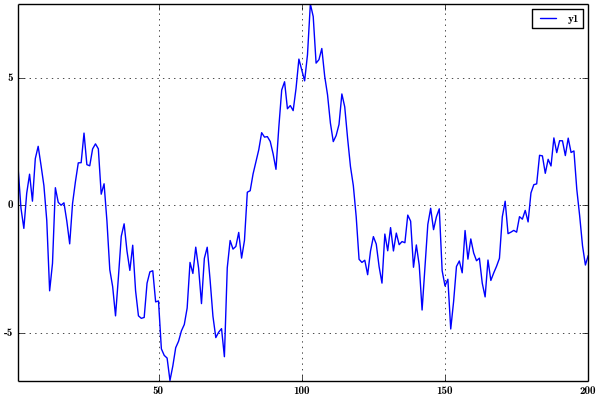

In [14]:
plot(time_series2(200, 0.9), color="blue")

# Exercise 6

Plot three simulated time series in one figure, one for each of the cases α=0, α=0.8 and α=0.98

(The figure illustrates how time series with the same one-step-ahead conditional volatilities, as these three processes have, can have very different unconditional volatilities.)

In [15]:
function mutil_time_series(t, alphas)
    [time_series2(t, α) for α in alphas]
end

mutil_time_series (generic function with 1 method)


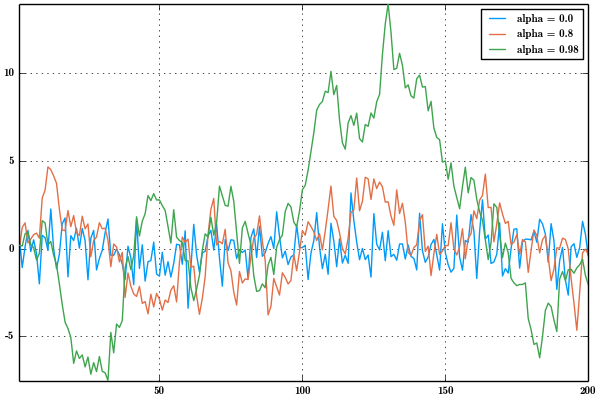

In [19]:
alphas = [0.0, 0.8, 0.98]
plot(mutil_time_series(200, alphas), label = ["alpha = $alpha" for alpha in alphas]')